In [57]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [58]:
df=pd.read_csv(r"Connections.csv")

In [59]:
df

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Saad,Sbiro,https://www.linkedin.com/in/saad-sbiro,NaN,NaN,NaN,22 Nov 2024
1,Adnane,Guennach,https://www.linkedin.com/in/adnaneguennach,NaN,Decathlon,Leader Sport,22 Nov 2024
2,Amina,issafar,https://www.linkedin.com/in/amina-issafar,NaN,NaN,NaN,22 Nov 2024
3,Ismail,Naijib,https://www.linkedin.com/in/ismail-najib,NaN,Freelance,Data Analyst,22 Nov 2024
4,Alae,Haddad,https://www.linkedin.com/in/alae-haddad-428633264,NaN,CMS,Full-stack Developer,22 Nov 2024
...,...,...,...,...,...,...,...
694,Faissal,MOUFLLA,https://www.linkedin.com/in/faissalmouflla,NaN,PEPPER WORLD,Data Analyst,17 Sep 2024
695,Omar,Dbaa,https://www.linkedin.com/in/omardbaa,NaN,IT Road Consulting,Back End Developer,17 Sep 2024
696,Emna,Bouharb,https://www.linkedin.com/in/emna-bouharb-90224...,bouharb.emna@gmail.com,Roundesk Technologies,Stagiaire,17 Sep 2024
697,Nadia,Timifas,https://www.linkedin.com/in/nadia-timifas-a1bb...,NaN,Geomatic,Data Scientist,17 Sep 2024


In [61]:

NewData = df.groupby('Company')[['First Name', 'Last Name']].size().reset_index(name='Count')


NewData = NewData.sort_values(by="Count", ascending=False)


NewData


,Company,Count
87,Cités des Métiers et des Compétences,32
145,Freelance,14
194,Jobintech,12
80,Capgemini Engineering,11
272,Orange Maroc,7
...,...,...
12,ALNOR,1
28,Agence Nationale Pour la Rénovation Urbaine et...,1
29,AhaSlides - Audience Engagement Platform,1
30,Al Barid Bank,1


In [62]:
my_name = "Aymen Rami"

NewData['My Name'] = my_name

Nombre de nœuds dans le graphe : 21
Nombre d'arêtes dans le graphe : 20


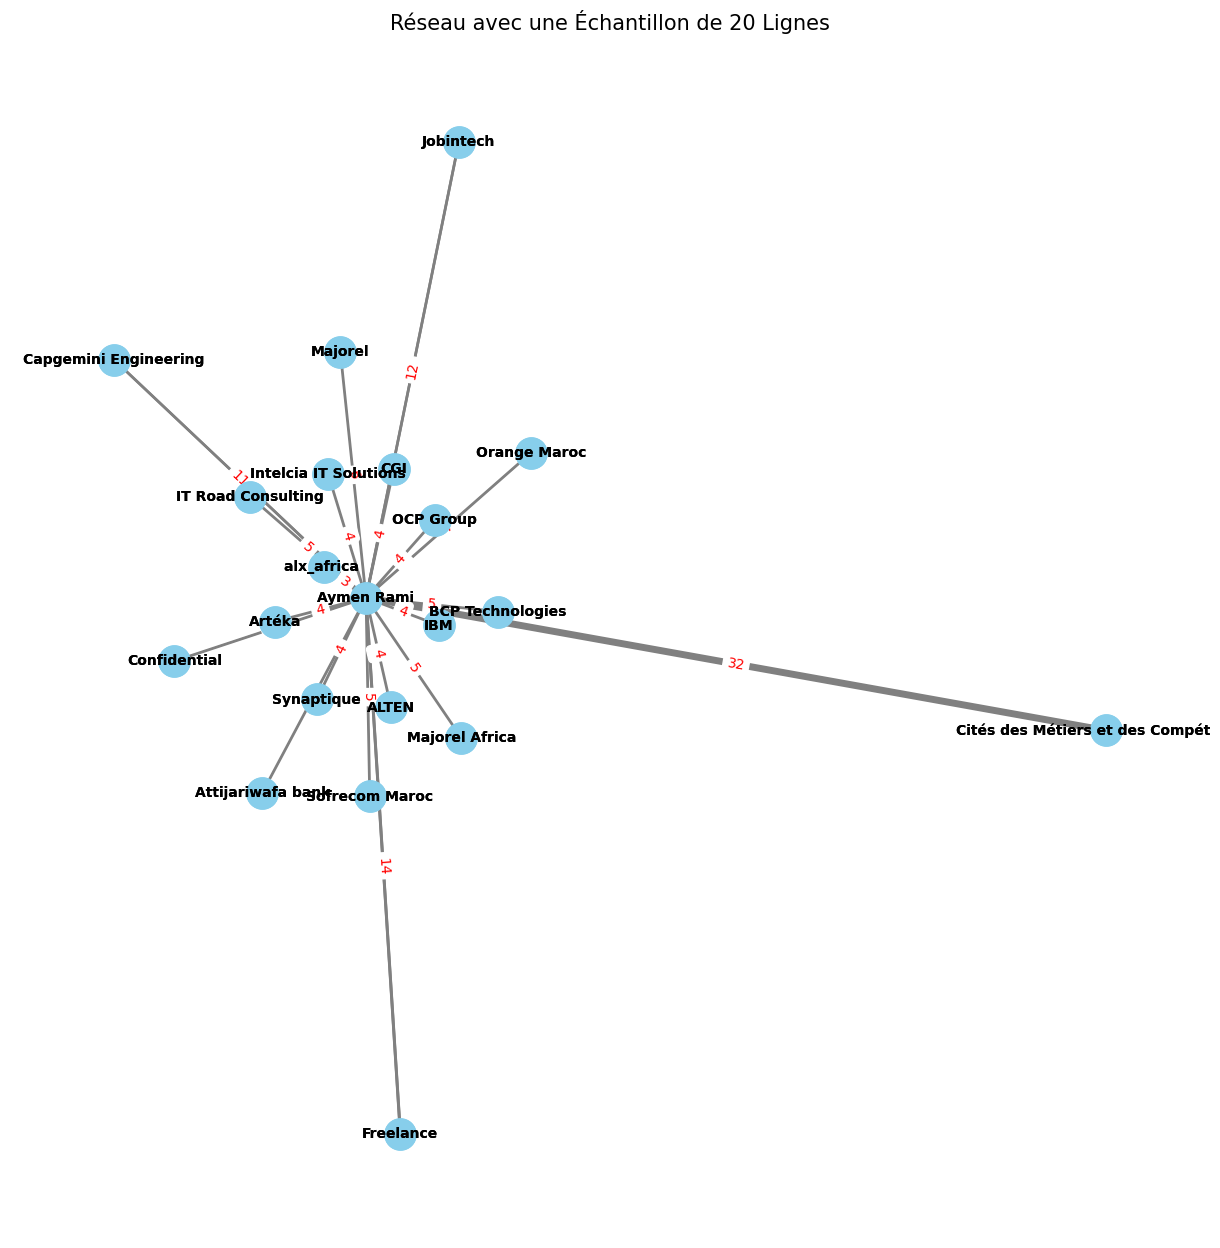

In [71]:
sample_size = 20
sample_data = NewData.head(sample_size)
G = nx.Graph()
my_name = sample_data['My Name'].iloc[0]  
G.add_node(my_name)
for index, row in sample_data.iterrows():
    company = row['Company']
    count = row['Count']
    G.add_node(company)
    G.add_edge(my_name, company, weight=count)
print(f"Nombre de nœuds dans le graphe : {len(G.nodes)}")
print(f"Nombre d'arêtes dans le graphe : {len(G.edges)}")
plt.figure(figsize=(12, 12))  
pos = nx.kamada_kawai_layout(G)
edge_width = [G[u][v]['weight'] / max(edge_width) * 5 for u, v in G.edges()]  # تكييف العرض
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=500,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    edge_color="gray",
    width=edge_width, 
) 
edge_width = [G[u][v]['weight'] for u, v in G.edges()]
nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", font_size=10, font_weight="bold", edge_color="gray", width=2)
edge_labels = {(u, v): G[u][v]['weight'] for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color="red")
plt.title("Réseau avec une Échantillon de 20 Lignes", fontsize=15)
plt.show()